<a href="https://colab.research.google.com/github/simran0794/logistic_regression/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_load=files.upload()
import pandas as pd
import plotly.express as px

Saving data.csv to data.csv


In [2]:
df=pd.read_csv('data.csv')
s=df["Score"].tolist()
a=df["Accepted"].tolist()
fig=px.scatter(x=s,y=a)
fig.show()

In [3]:
import numpy as np
score_list=np.array(s)
accepted_list=np.array(a)

m,c=np.polyfit(score_list,accepted_list,1)
y=[]
for x in score_list:
  y_value=m*x+c
  y.append(y_value)


In [4]:

fig=px.scatter(x=score_list,y=accepted_list)
fig.update_layout(shapes=[dict(type='line',y0=min(y),y1=max(y),x0=min(score_list),x1=max(score_list))])
fig.show()

In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
X=np.reshape(s,(len(s),1))
Y=np.reshape(a,(len(a),1))

X=np.array(s).reshape(-1,1)
Y=np.array(a).reshape(-1,1)

lr=LogisticRegression()
lr.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

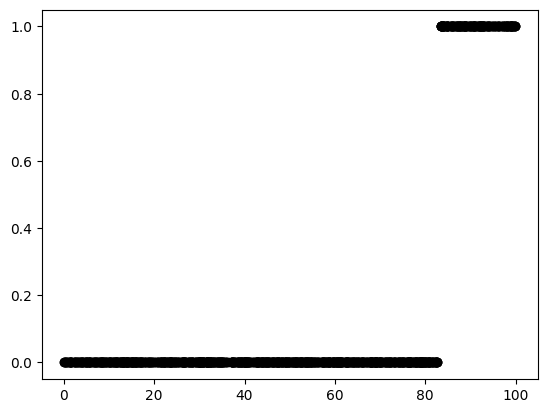

In [6]:
plt.figure()
plt.scatter(X.ravel(),Y,color='black',zorder=20)


In [7]:
def model(x):
  return 1/(1+np.exp(-x))

In [8]:
X_test=np.linspace(0,100,200)
chances=model(X_test*lr.coef_+lr.intercept_).ravel()

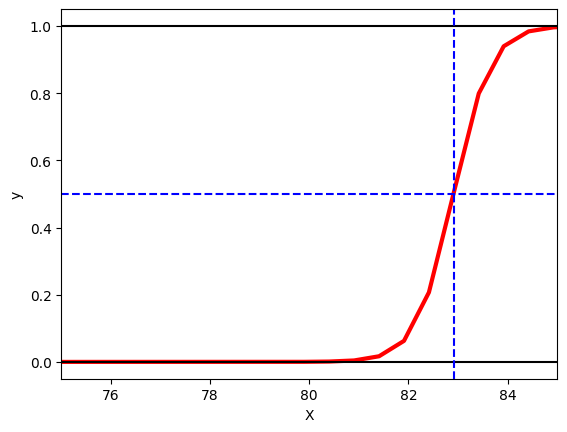

In [9]:
plt.plot(X_test,chances,color='red',linewidth=3)
plt.axhline(y=0,color='k',linestyle='-')
plt.axhline(y=1,color='k',linestyle='-')
plt.axhline(y=0.5,color='b',linestyle='--')

plt.axvline(x=X_test[165],color='b',linestyle='--')

plt.ylabel('y')
plt.xlabel('X')
plt.xlim(75,85)
plt.show()


In [10]:
user_score=float(input("Enter user number:"))
chances=model(user_score*lr.coef_+lr.intercept_).ravel()
print("chances are:",chances)
if chances>=1:
  print("User will be accepted ")
elif chances<=0.01:
  print("User will not be accepted")
elif chances<0.5:
  print("User might not get accepted")
else:
  print("User may get accepted")

Enter user number:50
chances are: [1.88454954e-39]
User will not be accepted
